# WHY USE TWILIO ?

  Twilio is an overall API that allows SMS, MMS, OTT messages globally. Allowing us to outreach to our clientale, in locations such as Arizona and California. It has 180 enabled phone numbers, and allows user to release a number once they have been used. Messages are utilized to send many messages in a short period of time, handling opt- in's and outs, and remain a consistent number to use it for many other features that Twilio provides. 

# How Twilio Integrates With API:

- You are able to track the delivery of the sent messages 
- Retrieve and modify message history 

## Step 1: Create Twilio Account 


### Step 2: Get your Account Keys
For every project you make, I suggest creating API keys for that project. This way we can turn them off at anytime (and thus prevent unwanted use) without causing distruption to other projects.

1. Go to [twilio.com/console/](https://twilio.com/console/)
2. Copy the `Account SID` (We'll store as `twilio_sid`)
3. Copy the `Auth Token` (We'll store as `twilio_secret`)
4. We'll save these in a file called `creds.json` in this one. We'll 100% need these in the future.

# What is Twilo_SID and Twilo_Secret?
- Twilio_SID and Twilio_Secret are the unique identifiers that is used for authentication for the user. This allows us to be able to acess the proxy we are working with, in this case our host is Twilio.


# The difference between the authencation token and the account sid ?
- Authencation Token: The authencation token is used to verify the identies, and remains self- contained for all the information.
- Application SID: This is a collection of URL's this is used for Twilio Client- in browsing calling. 

# Let's Send Messages Using Twilio:

Using Twilio's Account:
- Once you have signed up verify your phone number. 
- After you have verified your phone number you can either upgrade 
your account or choose to use the free trial phone number. 
- Keep in mind if the number is not verified then we cannot send messages. 
- It is only needed to pay 1.00/ month to make the numbers accesible for others. 

# Save The Recovery Code Just In Case Your Number is Ever Lost

In [1]:
 #recovery code: 4Rg7Os1ak9KmrTuQfZGVllc0BA455vb4HTCTfeuq

Why We Use Json Library?
- We're documenting our data in a pretty printing format that allows the API library to be 
user friendly. Json also allows us to store and exchange data. 

The data in our json file is collecting our API key. 

In [2]:
import json
from getpass import getpass

reset_creds = False

if reset_creds:
    twilio_sid = getpass("What's the Twilio Account SID?:")
    twilio_secret = getpass("What's the Twilio Secret?:")
    '''
    This will save our creds from above (blank or not) to a local file
    named `creds.json` so we can re-use this credentials.
    '''
    data = {
        "twilio_sid": twilio_sid,
        "twilio_secret": twilio_secret
    }
    json_data = json.dumps(data)
    with open('creds.json', 'w') as f:
        f.write(json_data)

We open our file and are overwriting within our file to print out the authencation keys and store it in our file.

In [3]:
!cat creds.json

{"twilio_sid": "", "twilio_secret": ""}

 Next,we must import the twilio library. 

### Step 3: Install twilio

In [4]:
 !pip install twilio

DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Defaulting to user installation because normal site-packages is not writeable


In [5]:
# sudo pip3 install twilio --upgrade

### Step 4: Load Creds

We are using the library .rest, and we are importing client to 
- authenicate the client
- create a new record 
- get existing records

In [6]:
import twilio
import twilio.rest
from twilio.rest import Client

Now, we are reading into the file by taking the inputs of the data
In other word's storing the client secret authencation and key in our 
json file. 

In [7]:
twilio_sid = "REMOVED"
twilio_secret = 'REMOVED'
with open('creds.json', 'r') as f:
        raw_data = f.read()
        cred_data = json.loads(raw_data)
        twilio_sid = cred_data.get('twilio_sid')
        twilio_secret = cred_data.get('twilio_secret')

Now we are setting our client to be able to call messages for our client. 
In this case, I am hardcoding my specific authencation keys 
but in order to make this work with more users we must 
set it pass twilio_sid and twilio_secret key.

In [8]:
from twilio.rest import Client

# client = Client(twilio_sid, twilio_secret)
client = Client("REMOVED","REMOVED")


### Step 5: Send Message

Now we take our number, and the number we are trying to outreach.

In [9]:
my_number = "REMOVED" #??
other_number = "REMOVED" # ??

Body represents the message we are trying to send to our user. 
This is an example of an alert message, we can send the user. 

Here we are making a dataset that we are sending the message that we composed in our body to and from the numbers.

In [14]:
body = "Fin Equiity-Alert: Hi Jonathan Your FICA Score Seems Low Today"
message_twilio = client.messages.create(
    body=body,
    from_=my_number,
    to=other_number
)

### Step 6: List Recent Messages

We create an ignore file, to block off the numbers that we are not sending or recieving numbers.
This stops from blocked or scam likely calls. So we read it into the ignore file.

In [15]:
ignore_numbers = []
with open('ignore.json', 'r') as f:
    data = json.loads(f.read())
    ignore_numbers = data.get('ignore')

Here we are checking that the message is being sent and fetched to the user. 
The instance_body allows us to see the message sent, from is the number primarly wjo it is coming from
This will be finequity -> client relationship.

In [22]:
msg_sid = message_twilio.sid
msg_sid

msg_ctx = client.messages.get(msg_sid)
msg_instance = msg_ctx.fetch()

msg_instance.body
msg_instance.from_
msg_instance.to

'REMOVED'

We can set a limitation of how many characthers or text messages can be sent to the user. 
We enumerate to the messages sent, to verify that it is sending to the right user. 
We hide the messages from a blocked number, or number that we do not have in our call list. 
Return the message if it is from me being sent to the other number.

In [17]:
messages = client.messages.list(limit=20, to=other_number)

for i, record in enumerate(messages):
    from_ = record.from_
    to = record.to
    if from_ in ignore_numbers:
        from_ = '~hidden~'
    if to in ignore_numbers:
        to = '~hidden~'
    from_me = False
    if from_ == my_number:
        from_me = True
    print(i, record.body, to, from_, from_me)

0 Fin Equiity-Alert: Hi Jonathan Your FICA Score Seems Low Today REMOVED REMOVED True
1 Hello world again REMOVED REMOVED True
2 Hello world again REMOVED REMOVED True
3 Hello world again REMOVED REMOVED True


## These are all the messages that we have outputted to our number and the frequency of the message. We can view the messages in our host file, which is attacked to WebHook. WebHook is used to identify call back triggered by the events through web applications. In other words, we should see the occurences of any phone call, messages, etc. 

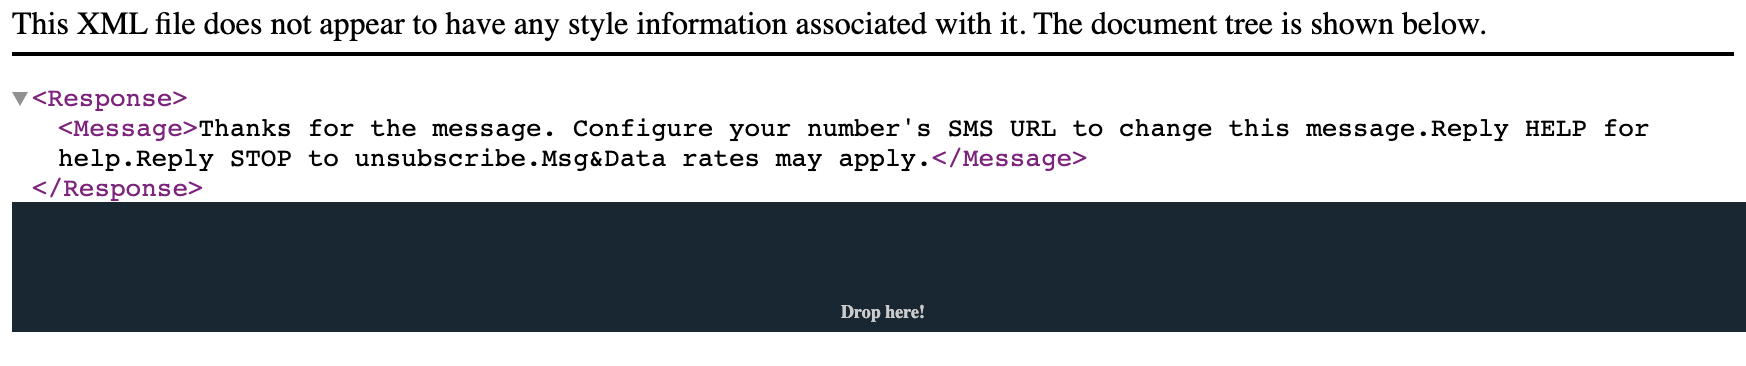

In [19]:
from IPython.display import Image
Image("Messages.png")

Here's the output confirming on our WebHook end that we have recieved the message. 

What Further Can Be Done With SMS and Twilio:
    - Use it With What's App?

Using Twilio With What's App Can Be An Advantage for Callers Who Sometimes 
Have To Go International, and users who face finacial insecurities that aren't stable 
with making phone payments and rely on internet service. 

https://www.twilio.com/docs/whatsapp/quickstart/python